In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Laste og large tekstfiler med Numpy

I denne notebooken vil vi lære mer om hvordan man laster inn og lagrer tekstfiler i Numpy. Dette kan være svært nyttige verktøy til å gjennomføre dataanalyse. Funksjonaliteten demonstreres derfor med en enkel dataanalyse på været i Trondheim i September og Oktober.

Filen vi vil laste inn i denne oppgaven ligger i samme mappe som notebooken, den heter `data.txt`. Gjerne ta en titt på filen for å se hvordan dataen er larget før du fortsetter denne notebooken. Kort fortalt inneholder filen værinformasjon fra Trondheim mellom 17.september og 16.oktober 2022. Dataen er lagret med komma som seperasjonstegn på følgende måte:

_Dato, Min, Maks, AVG, Nedbør_

_17 sep, 8.9, 10.7, 9.5, 36.4_

_18 sep, 8.40, 11.2, 9.1, 14.2_

_..._

_..._

Hvor `Dato` spesifierer dato, `Min` minste temperatur den dagen, `Maks` maksimum temperatur, `AVG` gjennomsnittlig temperatur og `Nedbør` nedbør målt i millimeter.

## Loadtxt
Det første vi ønsker å gjøre er å laste dataen inn i Python. Da kan vi bruke numpy's [`loadtxt`](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html) funksjon. Denne tar inn en filepath som obligatorisk argument samt spesiell argumenter som datatype, seperasjonstegn, og encoding. Du kan lese mer [her](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html).

In [2]:
# vi laster inn dataen i Python
# dtype=str sier at vi skal lese dataen som streng
# delimiter="," sier at skilletegnet i dataen er ,
# og tilslutt spesifiserer encoding at dataen er lagret i utf-8-sig format
data = np.loadtxt("data.txt", dtype=str, delimiter=",", encoding='utf-8-sig')

Merk over at vi må spesifiserer en encoding for at funksjonen skal fungere riktig. Dette er på grunn av at forskjellige dataprogrammer lagrer tegn på forskjellige måter. Her må man rett og slett bare prøve seg litt frem. Vanlige encodings er "utf-8", "utf-16" og "ascii".

In [3]:
data

array([['Dato', 'Min', 'Maks', 'AVG', 'Nedbør'],
       ['17 sep', '8.90', '10.70', '9.50', '36.40'],
       ['18 sep', '8.40', '11.20', '9.10', '14.20'],
       ['19 sep', '7.40', '10.00', '8.30', '2.20'],
       ['20 sep', '4.80', '10.10', '7.00', '1.10'],
       ['21 sep', '2.50', '9.60', '6.50', '0.00'],
       ['22 sep', '5.20', '12.20', '9.10', '0.00'],
       ['23 sep', '8.90', '11.80', '9.70', '1.40'],
       ['24 sep', '4.50', '10.90', '7.90', '8.80'],
       ['25 sep', '2.60', '13.30', '8.20', '0.00'],
       ['26 sep', '7.40', '12.70', '10.30', '2.50'],
       ['27 sep', '9.00', '13.90', '11.20', '0.10'],
       ['28 sep', '5.80', '15.10', '10.40', '0.00'],
       ['29 sep', '3.40', '10.70', '7.60', '0.00'],
       ['30 sep', '5.80', '14.10', '8.70', '0.40'],
       ['1 okt', '8.30', '13.10', '10.90', '0.00'],
       ['2 okt', '7.70', '11.70', '9.20', '0.70'],
       ['3 okt', '6.40', '10.60', '8.40', '2.00'],
       ['4 okt', '6.80', '12.60', '9.40', '3.70'],
       ['5 okt

Som vi kan se over har dataen blitt lastet inn i en 2D Numpy-array. En viktig ting å notere seg er at dataen vår består av både strenger og flyttall, men er lagret som en streng-array siden numpy arrays kun kan ha en datatype. Vi må derfor skille dataen fra hverandre. 

Vi ønsker å lagre dataen i en dictionary med den øverste raden som nøkler og numpy-arrays med kolonnene som verdier i dictionarien. Vi gjør dette under.

In [10]:
# vi tar første rad og lagrer som nøkler
keys = data[0,:]

# vi må også behandle dato kolonnen for seg selv siden den består av strenger
# pass på at du forstår slicingen under, vi tar alle rader bortsett fra den første og den første kolonnen
date_column = data[1:,0]

# vi slicer deretter ut flyttall dataen og konverterer den fra strenger til flyttall
non_date = data[1:,1:]
non_date = non_date.astype(float)

Nå som dataen er behandlet og lagret separat kan vi lage dictionaryen.

In [11]:
# vi starter med å oprette en tom dictionary
data_dict = {}

# vi itererer så over kolonnenavnene i keys og bruker de som nøkler
for i in range(len(keys)):
    # hvis nøklen er dato skal vi bruke dataen lagret i date_column
    if keys[i]=="Dato":
        data_dict["Dato"] = date_column
    # ellers, skal vi bruke dataen fra non_date
    # vi bruke kolonne i-1 fra non_data siden den ikke har datokolonnen i seg
    else:
        data_dict[keys[i]] = non_date[:, i-1]

In [12]:
data_dict

{'Dato': array(['17 sep', '18 sep', '19 sep', '20 sep', '21 sep', '22 sep',
        '23 sep', '24 sep', '25 sep', '26 sep', '27 sep', '28 sep',
        '29 sep', '30 sep', '1 okt', '2 okt', '3 okt', '4 okt', '5 okt',
        '6 okt', '7 okt', '8 okt', '9 okt', '10 okt', '11 okt', '12 okt',
        '13 okt', '14 okt', '15 okt', '16 okt'], dtype='<U6'),
 'Min': array([8.9, 8.4, 7.4, 4.8, 2.5, 5.2, 8.9, 4.5, 2.6, 7.4, 9. , 5.8, 3.4,
        5.8, 8.3, 7.7, 6.4, 6.8, 5.3, 3.7, 3. , 4.5, 4. , 7.8, 3.4, 2.1,
        3.3, 0. , 1.8, 0.7]),
 'Maks': array([10.7, 11.2, 10. , 10.1,  9.6, 12.2, 11.8, 10.9, 13.3, 12.7, 13.9,
        15.1, 10.7, 14.1, 13.1, 11.7, 10.6, 12.6, 12. , 10.1, 10.6,  7.4,
         9.7, 14. ,  8.7,  7.8,  7.5,  9.1,  8. ,  8.3]),
 'AVG': array([ 9.5,  9.1,  8.3,  7. ,  6.5,  9.1,  9.7,  7.9,  8.2, 10.3, 11.2,
        10.4,  7.6,  8.7, 10.9,  9.2,  8.4,  9.4,  8.2,  7.3,  7. ,  5.4,
         7.2, 10.7,  4.6,  5.7,  5.5,  3.7,  4.7,  4.1]),
 'Nedbør': array([36.4, 14.2,  2.2, 

Nå ser vi at vi har klart å lage den datastrukturen vi ønsket. Da kan vi fortsett over til selve dataanalysen.

## Plotte temperaturer

Først ønsker vi å se hvordan temperatur utviklingen har vært den siste måneden. Vi bruker da matplotlib og plotter linjeplots av hver temperaturkolonnen i dictionaryen.

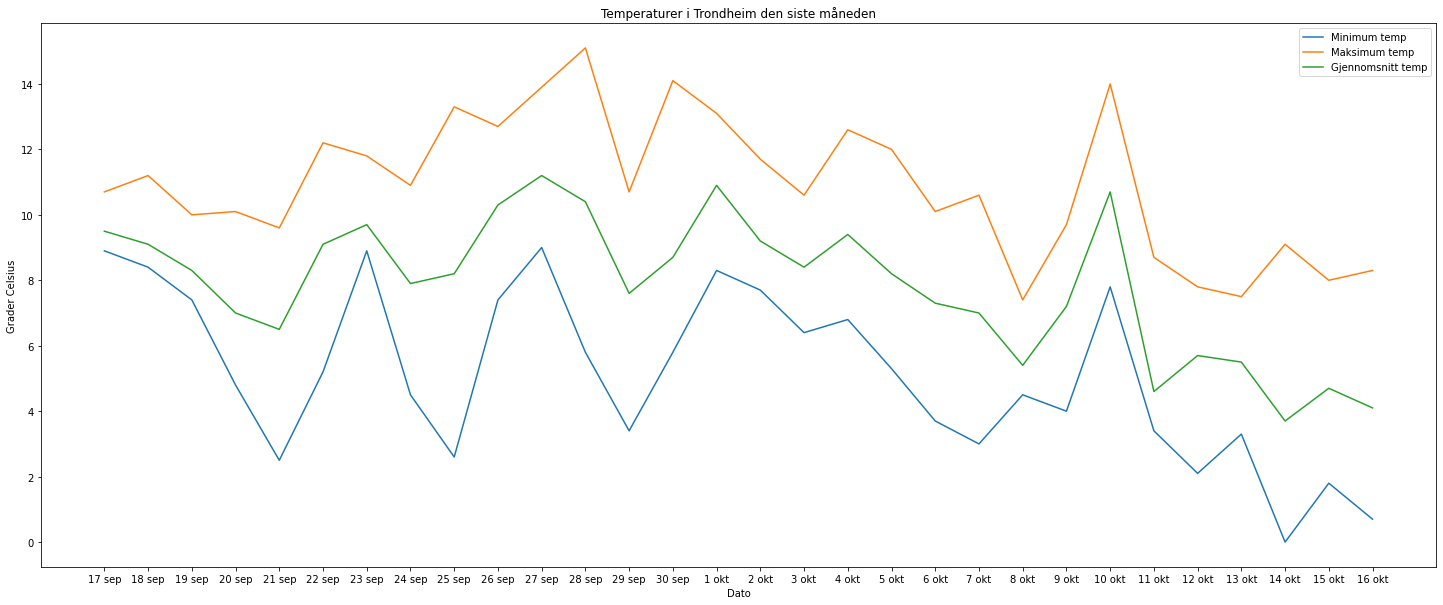

In [14]:
# lager figuren
plt.figure(figsize=(25,10))
# for hver av de tre temperaturmålingene plotter vi dato mot temperatur for å se utviklingen
plt.plot(data_dict['Dato'], data_dict['Min'], label='Minimum temp')
plt.plot(data_dict['Dato'], data_dict['Maks'], label='Maksimum temp')
plt.plot(data_dict['Dato'], data_dict['AVG'], label='Gjennomsnitt temp')

# setter legend, tittel og aksetitler
plt.legend()
plt.title("Temperaturer i Trondheim den siste måneden")
plt.xlabel("Dato")
plt.ylabel("Grader Celsius")
plt.show()

## Temperatur og nedbør

Videre, er vi interessert i å se om det er noen sammenheng mellom temperatur og nedbør i Trondheim. Vi velger derfor å plotte gjennomsnittstemperaturen og nedbørsmengden ved hjelp av et scatterplot:

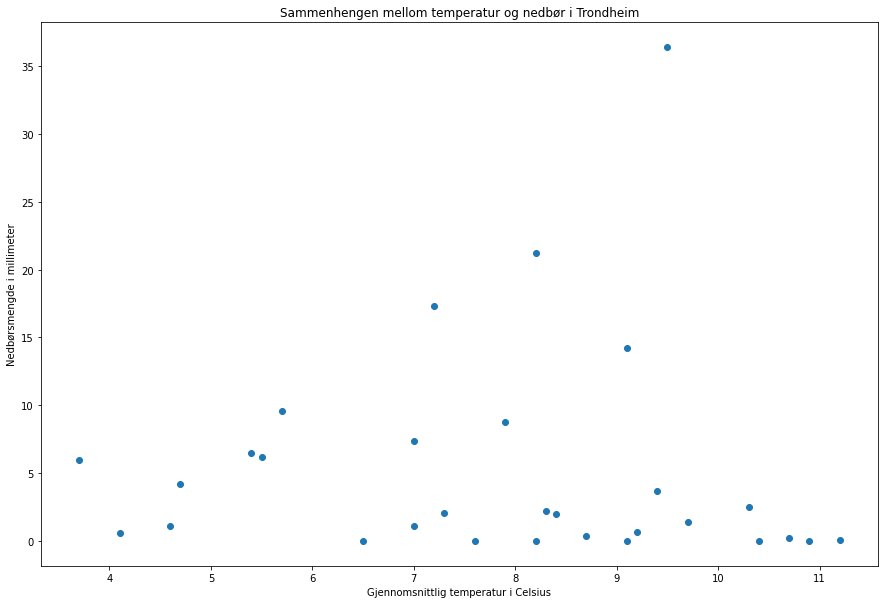

In [17]:
plt.figure(figsize=(15,10))
# scatter plots lages med plt.scatter(x, y) hvor x er variabelen vi vil ha på x-aksen og y vice versa på y-aksen
plt.scatter(data_dict['AVG'], data_dict['Nedbør'], label="Observasjon")
plt.title("Sammenhengen mellom temperatur og nedbør i Trondheim")
plt.xlabel("Gjennomsnittlig temperatur i Celsius")
plt.ylabel("Nedbørsmengde i millimeter")
plt.show()

Fra plottet ovenfor ser det ut som det er lite sammenheng mellom temperatur og nedbør i Trondheim. Men vi har en hypotese til vi ønsker å teste. Vi vil se om det er en sammenheng mellom differansen i maksimum og minimum temperatur og nedbør i Trondheim. For å finne ut av dette må vi legge til et nytte nøkkel-verdi par i dictionaryen vår. Her kommer en av fordelene med numpy arrays frem. Vi kan regne den elementvise differansen mellom to numpy arrays ved å skrive arr1-arr2. Veldig enkelt med andre ord.

In [18]:
# lager nytt nøkkel-verdi par som er differansen mellom maks og minimum temperatur
data_dict["differanse"] = data_dict.get("Maks")-data_dict.get("Min")

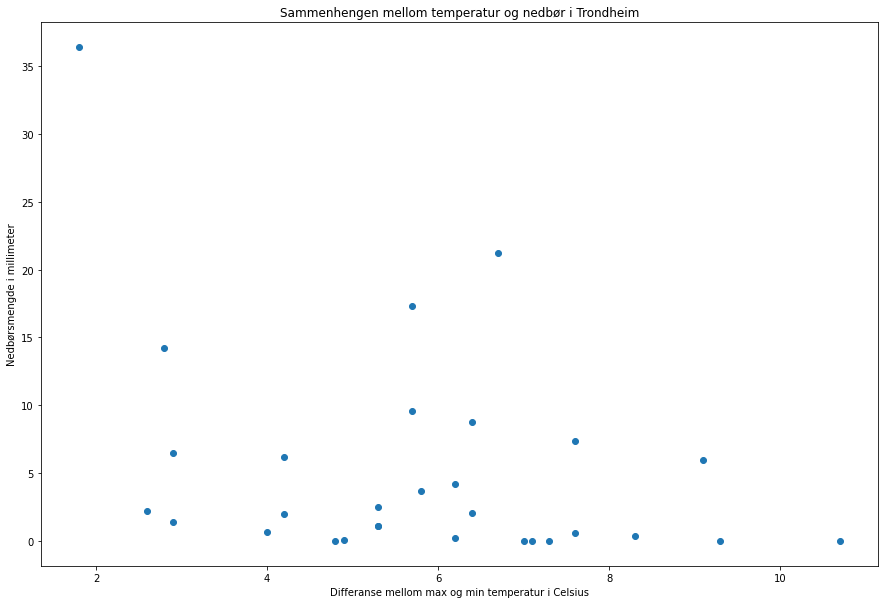

In [21]:
# vi forsøker så å plotte sammenhengen mellom differeansen og nedbørsmengde
plt.figure(figsize=(15,10))
# scatter plots lages med plt.scatter(x, y) hvor x er variabelen vi vil ha på x-aksen og y vice versa på y-aksen
plt.scatter(data_dict['differanse'], data_dict['Nedbør'])
plt.title("Sammenhengen mellom temperatur og nedbør i Trondheim")
plt.xlabel("Differanse mellom max og min temperatur i Celsius")
plt.ylabel("Nedbørsmengde i millimeter")
plt.show()

Hmmm, det er fortsatt ingen tegn til sammenhenger. Vi ønsker allikevel å lagre dataen slik at vi har den til senere analyser. Da kan vi bruke numpy's funksjon `savetxt`. Denne tar som input filepath og dataen som skal bli lagret. Mer informasjon finner du [her](https://numpy.org/doc/stable/reference/generated/numpy.savetxt.html). For at vi skal kunne lagre dataen må vi først konvertere den tilbake til en Numpy array, altså inversere operasjonene vi gjorde tidligere.

In [42]:
# vi starter med å reversere de tidligere endringene

# først lager vi en liste bestående av de seks arraysa i dictionaryen
# dette gjør vi å bruke dict.values()
temp_list = list(data_dict.values())

In [43]:
temp_list

[array(['17 sep', '18 sep', '19 sep', '20 sep', '21 sep', '22 sep',
        '23 sep', '24 sep', '25 sep', '26 sep', '27 sep', '28 sep',
        '29 sep', '30 sep', '1 okt', '2 okt', '3 okt', '4 okt', '5 okt',
        '6 okt', '7 okt', '8 okt', '9 okt', '10 okt', '11 okt', '12 okt',
        '13 okt', '14 okt', '15 okt', '16 okt'], dtype='<U6'),
 array([8.9, 8.4, 7.4, 4.8, 2.5, 5.2, 8.9, 4.5, 2.6, 7.4, 9. , 5.8, 3.4,
        5.8, 8.3, 7.7, 6.4, 6.8, 5.3, 3.7, 3. , 4.5, 4. , 7.8, 3.4, 2.1,
        3.3, 0. , 1.8, 0.7]),
 array([10.7, 11.2, 10. , 10.1,  9.6, 12.2, 11.8, 10.9, 13.3, 12.7, 13.9,
        15.1, 10.7, 14.1, 13.1, 11.7, 10.6, 12.6, 12. , 10.1, 10.6,  7.4,
         9.7, 14. ,  8.7,  7.8,  7.5,  9.1,  8. ,  8.3]),
 array([ 9.5,  9.1,  8.3,  7. ,  6.5,  9.1,  9.7,  7.9,  8.2, 10.3, 11.2,
        10.4,  7.6,  8.7, 10.9,  9.2,  8.4,  9.4,  8.2,  7.3,  7. ,  5.4,
         7.2, 10.7,  4.6,  5.7,  5.5,  3.7,  4.7,  4.1]),
 array([36.4, 14.2,  2.2,  1.1,  0. ,  0. ,  1.4,  8.8,  0. ,  2.5

In [44]:
# vi gjør så liste om til et numpy array
temp_array = np.asarray(temp_list)

In [45]:
temp_array

array([['17 sep', '18 sep', '19 sep', '20 sep', '21 sep', '22 sep',
        '23 sep', '24 sep', '25 sep', '26 sep', '27 sep', '28 sep',
        '29 sep', '30 sep', '1 okt', '2 okt', '3 okt', '4 okt', '5 okt',
        '6 okt', '7 okt', '8 okt', '9 okt', '10 okt', '11 okt', '12 okt',
        '13 okt', '14 okt', '15 okt', '16 okt'],
       ['8.9', '8.4', '7.4', '4.8', '2.5', '5.2', '8.9', '4.5', '2.6',
        '7.4', '9.0', '5.8', '3.4', '5.8', '8.3', '7.7', '6.4', '6.8',
        '5.3', '3.7', '3.0', '4.5', '4.0', '7.8', '3.4', '2.1', '3.3',
        '0.0', '1.8', '0.7'],
       ['10.7', '11.2', '10.0', '10.1', '9.6', '12.2', '11.8', '10.9',
        '13.3', '12.7', '13.9', '15.1', '10.7', '14.1', '13.1', '11.7',
        '10.6', '12.6', '12.0', '10.1', '10.6', '7.4', '9.7', '14.0',
        '8.7', '7.8', '7.5', '9.1', '8.0', '8.3'],
       ['9.5', '9.1', '8.3', '7.0', '6.5', '9.1', '9.7', '7.9', '8.2',
        '10.3', '11.2', '10.4', '7.6', '8.7', '10.9', '9.2', '8.4',
        '9.4', '8.2', 

Vi ser at dataen nå ligger lagret som rader istedenfor kolonner som den opprinnelig dataen gjorde. Derfor transponerer vi arrayet. Dette vil si at radene blir kolonner og omvendt. Dette gjøres veldig enkelt i numpy ved å bruke `arr.T`.

In [58]:
# transponerer arrayet
temp_array = temp_array.T

In [59]:
temp_array

array([['17 sep', '8.9', '10.7', '9.5', '36.4', '1.799999999999999'],
       ['18 sep', '8.4', '11.2', '9.1', '14.2', '2.799999999999999'],
       ['19 sep', '7.4', '10.0', '8.3', '2.2', '2.5999999999999996'],
       ['20 sep', '4.8', '10.1', '7.0', '1.1', '5.3'],
       ['21 sep', '2.5', '9.6', '6.5', '0.0', '7.1'],
       ['22 sep', '5.2', '12.2', '9.1', '0.0', '6.999999999999999'],
       ['23 sep', '8.9', '11.8', '9.7', '1.4', '2.9000000000000004'],
       ['24 sep', '4.5', '10.9', '7.9', '8.8', '6.4'],
       ['25 sep', '2.6', '13.3', '8.2', '0.0', '10.700000000000001'],
       ['26 sep', '7.4', '12.7', '10.3', '2.5', '5.299999999999999'],
       ['27 sep', '9.0', '13.9', '11.2', '0.1', '4.9'],
       ['28 sep', '5.8', '15.1', '10.4', '0.0', '9.3'],
       ['29 sep', '3.4', '10.7', '7.6', '0.0', '7.299999999999999'],
       ['30 sep', '5.8', '14.1', '8.7', '0.4', '8.3'],
       ['1 okt', '8.3', '13.1', '10.9', '0.0', '4.799999999999999'],
       ['2 okt', '7.7', '11.7', '9.2', '0.

Nå begynner det å ligne på den originale dataen. Alt som mangler er kolonnenavnene. Disse finner vi ved å bruke `dict.keys()` og så sette de på toppen av arrayet ved å bruke `np.vstack((arr1, arr2))`. `np.vstack` konkatenerer to arrays vertikalt slik at man får nytt arrays bestående av radene i den to arraysa.

In [65]:
# lager et array med keys som verdier
keys = np.asarray(list(data_dict.keys()))
# stacker keys og dataen sammen
save_array = np.vstack((keys, temp_array))
save_array

array([['Dato', 'Min', 'Maks', 'AVG', 'Nedbør', 'differanse'],
       ['17 sep', '8.9', '10.7', '9.5', '36.4', '1.799999999999999'],
       ['18 sep', '8.4', '11.2', '9.1', '14.2', '2.799999999999999'],
       ['19 sep', '7.4', '10.0', '8.3', '2.2', '2.5999999999999996'],
       ['20 sep', '4.8', '10.1', '7.0', '1.1', '5.3'],
       ['21 sep', '2.5', '9.6', '6.5', '0.0', '7.1'],
       ['22 sep', '5.2', '12.2', '9.1', '0.0', '6.999999999999999'],
       ['23 sep', '8.9', '11.8', '9.7', '1.4', '2.9000000000000004'],
       ['24 sep', '4.5', '10.9', '7.9', '8.8', '6.4'],
       ['25 sep', '2.6', '13.3', '8.2', '0.0', '10.700000000000001'],
       ['26 sep', '7.4', '12.7', '10.3', '2.5', '5.299999999999999'],
       ['27 sep', '9.0', '13.9', '11.2', '0.1', '4.9'],
       ['28 sep', '5.8', '15.1', '10.4', '0.0', '9.3'],
       ['29 sep', '3.4', '10.7', '7.6', '0.0', '7.299999999999999'],
       ['30 sep', '5.8', '14.1', '8.7', '0.4', '8.3'],
       ['1 okt', '8.3', '13.1', '10.9', '0.0', '

Da er dataen ferdig behandlet og klar for å lagres med `np.savetxt()`

In [68]:
# vi må spesifisere at det er en array med strenger vi skal lagre med keywordet fmt
# og encoding med encoding="utf-8"
np.savetxt("saved_data.txt", save_array, fmt="%s", encoding="utf-8")

Nå er dataen ferdig lagret og vi er ferdig med vår analyse. Gjerne ta en titt på filen du nettopp lagret for å forstå formatet. 